In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import json
import ast


# Brief analysis of the data

In [3]:
movie_metadata = pd.read_csv('dataset/MovieSummaries/movie.metadata.tsv', sep='\t', header=None , 
names=['WikiID', 'FreebaseID', 'Name', 'Release', 'BoxRevenue', 'Runtime', 'Languages', 'Countries', 'Genres'])
movie_metadata.head()

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
movie_metadata["Release"] = movie_metadata["Release"].apply(lambda x: pd.to_datetime(x, errors = 'coerce')).apply(lambda x: x.strftime('%Y') if pd.notnull(x) else x)
movie_metadata["Countries"] = movie_metadata["Countries"].apply(lambda x: list(ast.literal_eval(x).values()) if pd.notnull(x) else x)
movie_metadata["Languages"] = movie_metadata["Languages"].apply(lambda x: list(ast.literal_eval(x).values()) if pd.notnull(x) else x)
movie_metadata["Genres"] = movie_metadata["Genres"].apply(lambda x: list(ast.literal_eval(x).values()) if pd.notnull(x) else x)


movie_metadata.head()

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


1. Wikipedia movie ID
2. Freebase movie ID
3. Movie name
4. Movie release date
5. Movie box office revenue
6. Movie runtime
7. Movie languages (Freebase ID:name tuples)
8. Movie countries (Freebase ID:name tuples)
9. Movie genres (Freebase ID:name tuples)

In [5]:
processed = movie_metadata
processed = processed.explode(column="Countries").reset_index(drop = True)
processed.head()

,WikiID,FreebaseID,Name,Release,BoxRevenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],United States of America,"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],Norway,"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],United Kingdom,"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],Germany,[Drama]


In [6]:
processed.groupby(by="Countries")["Name"].count().nlargest(5, "all").sort_values(ascending=False)

Countries
United States of America    34408
India                        8411
United Kingdom               7868
France                       4395
Italy                        3163
Name: Name, dtype: int64

In [7]:
#processed.groupby(by="Countries")["Name"].count()[processed.groupby(by="Countries")["Name"].count().apply(lambda x: x>100)].sort_values(ascending=False)

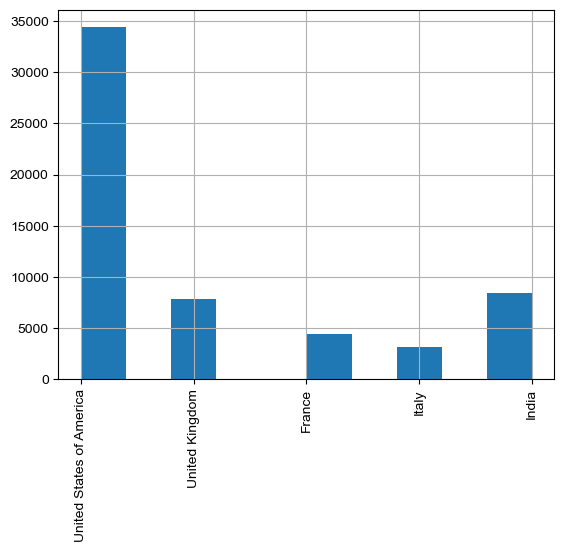

In [8]:
k = processed.groupby(by="Countries")["Name"].count().nlargest(5).index
pruned = processed[processed["Countries"].apply(lambda x: x in k)]
#sns.histplot(data= pruned, y="Countries")
pruned["Countries"].hist()
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("darkgrid")


<AxesSubplot:xlabel='Release', ylabel='Countries'>

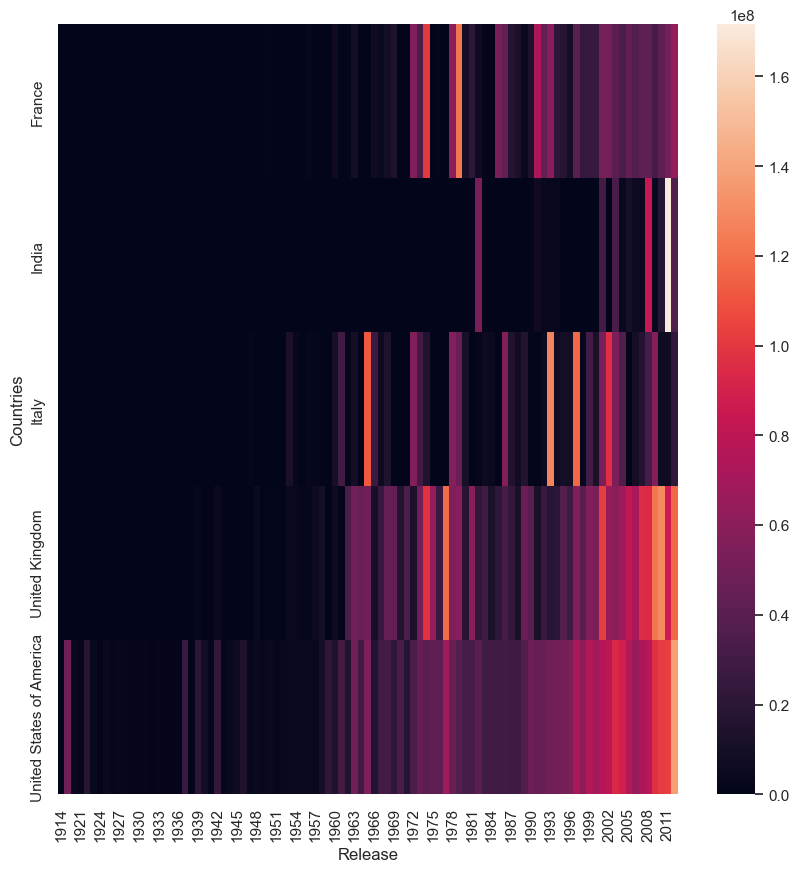

In [9]:
temp = pruned.pivot_table(index = 'Countries', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0)
#temp = temp.loc[:, temp.apply(lambda x: int(x.name)>1950, axis = 0)]

sns.heatmap(temp)

<AxesSubplot:ylabel='Genres'>

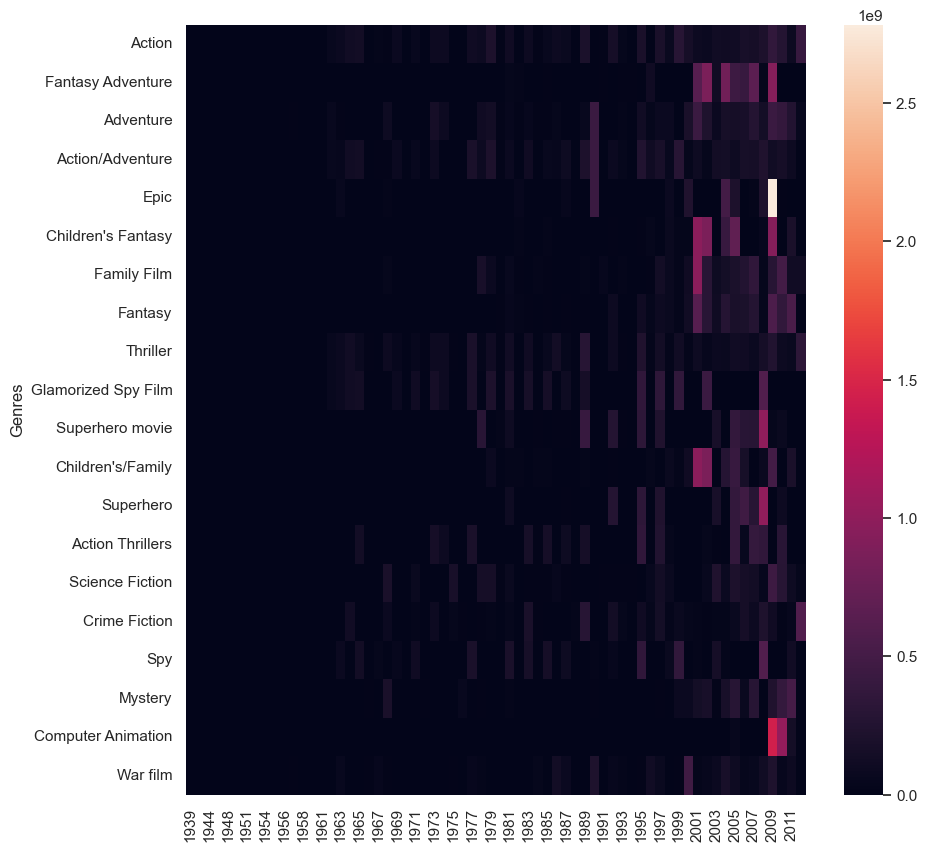

In [10]:
exploded = pruned[pruned["Countries"].apply(lambda x: x =="United Kingdom" )].explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0)
d = tmp.apply(lambda x: sum(x), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(20, "tmp").drop('tmp', axis=1)
#tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
sns.heatmap(tmp)

<AxesSubplot:ylabel='Genres'>

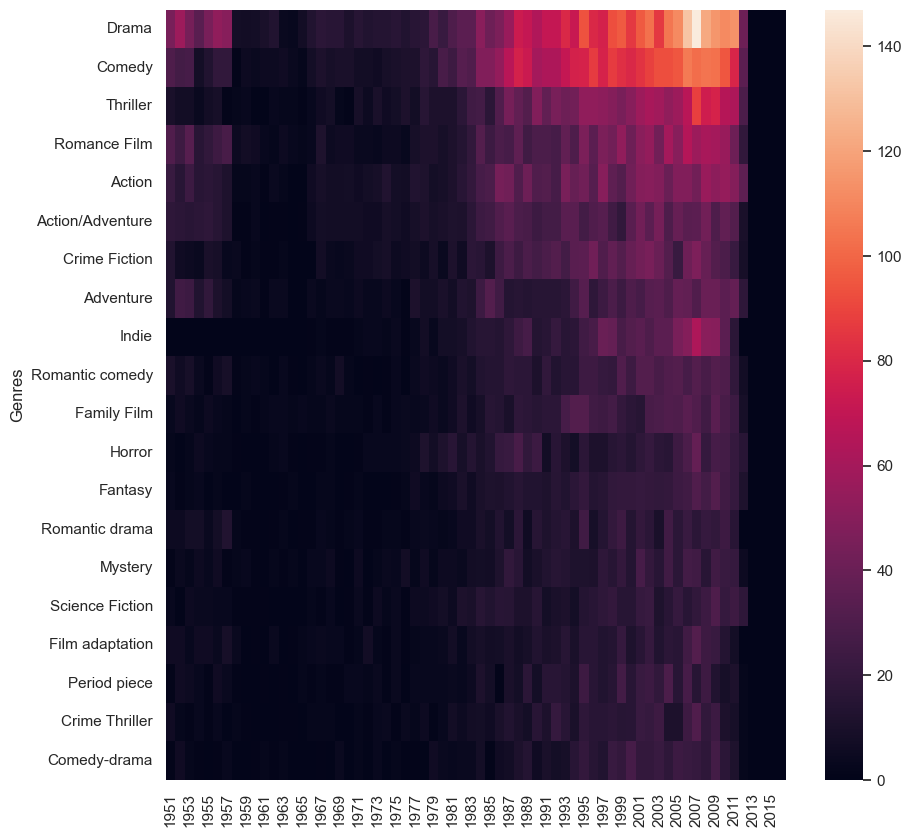

In [11]:
exploded = pruned[pruned["Countries"].apply(lambda x: x =="United States of America" )].explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='count', fill_value=0)
d = tmp.apply(lambda x: sum(x), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(20, 'tmp').drop('tmp', axis=1)
tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
sns.heatmap(tmp)


<AxesSubplot:ylabel='Genres'>

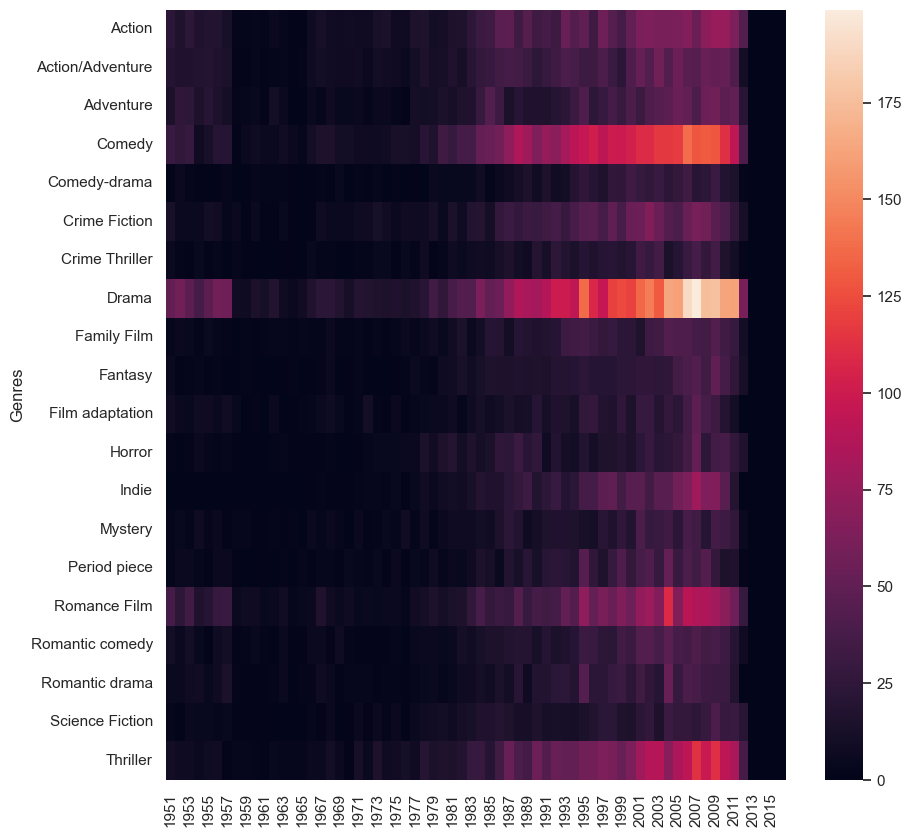

In [12]:
exploded = pruned.explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='count', fill_value=0)
d = tmp.apply(lambda x: x.sum(skipna=True), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(20, 'tmp').drop('tmp', axis=1)
tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
tmp = tmp.sort_index()
sns.heatmap(tmp)
#tmp

<AxesSubplot:ylabel='Genres'>

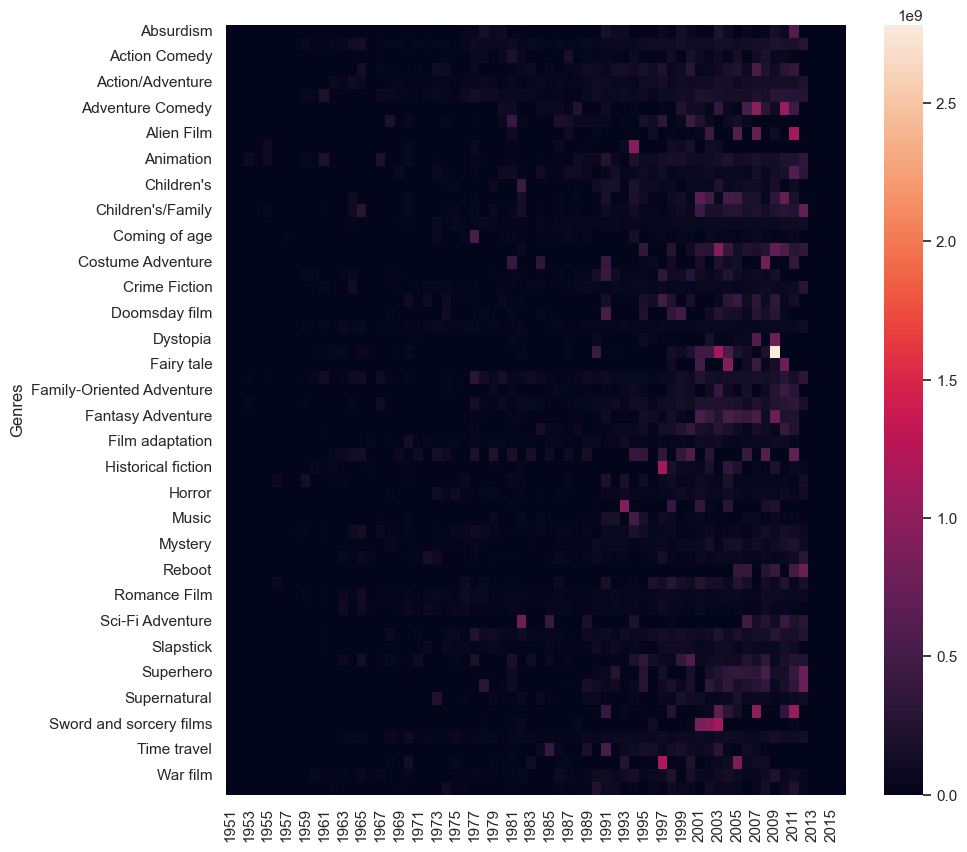

In [13]:
exploded = pruned.explode("Genres")
tmp = exploded.pivot_table(index = 'Genres', columns='Release', values='BoxRevenue', aggfunc='mean', fill_value=0, dropna=False)
d = tmp.apply(lambda x: x.sum(skipna=True), axis = 1)
d.name = 'tmp'
tmp = pd.concat([tmp, d], axis=1).nlargest(60, 'tmp').drop('tmp', axis=1)
tmp = tmp.loc[:, tmp.apply(lambda x: int(x.name)>1950, axis = 0)]
tmp = tmp.sort_index()
#tmp = tmp.loc[["Drama", "Comedy", "Romance Film"], :]
sns.heatmap(tmp)
#tmp


In [102]:
characters = pd.read_csv('dataset/MovieSummaries/character.metadata.tsv', sep='\t', header=None, 
names = ["WikiID", "FreebaseID", "Release", "Character name", "Birth", 
"Gender", "Height (m)", "Ethnicity", "Name", "Age at movie release",
"Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"])
characters["Release"] = characters["Release"].apply(lambda x: pd.to_datetime(x, errors = 'coerce')).apply(lambda x: x.strftime('%Y') if pd.notnull(x) else x)
characters["Birth"] = characters["Birth"].apply(lambda x: pd.to_datetime(x, errors = 'coerce')).apply(lambda x: x.strftime('%Y') if pd.notnull(x) else x)
characters.head()


,WikiID,FreebaseID,Release,Character name,Birth,Gender,Height (m),Ethnicity,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001,Akooshay,1958,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,1974,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001,Desolation Williams,1969,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,1967,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001,Bashira Kincaid,1977,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [103]:
ethnicities = characters['Ethnicity'].dropna().unique().tolist()

In [104]:
import requests

def get_ethnicities(ids):

  tmp = '""'.join(ids)

  url = 'https://query.wikidata.org/sparql'
  query = '''
  SELECT  ?ethnicities ?sLabel WHERE {
  VALUES ?ethnicities {"'''+tmp+'''"} 
  ?s wdt:P646 ?ethnicities .

    SERVICE wikibase:label {
      bd:serviceParam wikibase:language "en" .
    }
  }
  '''
  r = requests.post(url, params = {'format': 'json', 'query': query})
  data = r.json()
  return data

In [105]:
d1 = get_ethnicities(ethnicities[1:200])
d2 = get_ethnicities(ethnicities[201:478])
tmp1 = []
tmp2 = []
for d in (d1, d2):
    for el in d["results"]["bindings"]:
        tmp1.append(el["ethnicities"]["value"])
        tmp2.append(el["sLabel"]["value"])
table_eth = pd.DataFrame(tmp1, tmp2).reset_index().rename(columns = {"index": "Ethnicities", 0: "code"})
table_eth.head()

,Ethnicities,code
0,European Americans,/m/02vsw1
1,Slavs,/m/0790v
2,German Americans,/m/01qhm_
3,Swiss,/m/025_0f0
4,Omaha people,/m/064b9n


In [106]:
"""Example of Python client calling Knowledge Graph Search API."""
import json
import urllib

ids = list(set(ethnicities) - set(table_eth["code"]))

api_key = open("api_key.txt").read()
service_url = 'https://kgsearch.googleapis.com/v1/entities:search'
params = {
    'limit': 500,
    'indent': True,
    'key': api_key,
}
url = service_url + '?' + 'ids='+'&ids='.join(ids).replace("/", "%2F" )+'&'+urllib.parse.urlencode(params)
response = json.loads(urllib.request.urlopen(url).read())
for element in response['itemListElement']:
  print(element['result']['name'] + ' (' + str(element['result']["@id"]) + ')')


Asante people (kg:/m/01flqq)
Saliya (kg:/m/071drf)
Han Chinese (kg:/m/013y54)
Samoan New Zealanders (kg:/m/0404kdr)


In [107]:

tmp1 = []
tmp2 = []
for element in response['itemListElement']:
    tmp2.append(element['result']['name'])
    tmp1.append(element['result']["@id"])
table_eth = pd.concat([table_eth, pd.DataFrame(tmp1, tmp2).reset_index().rename(columns = {"index": "Ethnicities", 0: "code"})])
table_eth.head()

,Ethnicities,code
0,European Americans,/m/02vsw1
1,Slavs,/m/0790v
2,German Americans,/m/01qhm_
3,Swiss,/m/025_0f0
4,Omaha people,/m/064b9n


In [108]:
characters["Ethnicity"] = characters["Ethnicity"].apply(lambda x: table_eth["Ethnicities"][table_eth["code"]==x].values[0]
if any(table_eth["code"]==x) else x)
characters.head()

,WikiID,FreebaseID,Release,Character name,Birth,Gender,Height (m),Ethnicity,Name,Age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001,Akooshay,1958,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001,Lieutenant Melanie Ballard,1974,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001,Desolation Williams,1969,M,1.727,African Americans,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001,Sgt Jericho Butler,1967,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001,Bashira Kincaid,1977,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [109]:
charac_group = pruned.groupby(by="Countries", as_index=True).apply(lambda x: 
characters[["WikiID", "Release", "Gender", "Ethnicity","Age at movie release", "Birth"]][characters["WikiID"].isin(x["WikiID"])])
#.insert(0, 'MovieID', y)
charac_group.head()

WikiID Release Gender Ethnicity  Age at movie release Birth
Countries                                                                   
France    99   22087420    1959      M       NaN                  56.0  1903
          215  23215861    1982      M       NaN                   NaN  1944
          216  23215861    1982    NaN       NaN                   NaN   NaT
          217  23215861    1982      M       NaN                   NaN  1940
          218  23215861    1982      F       NaN                   NaN  1940

In [112]:
charac_group.to_pickle("data/charac_group")

C:\Users\nico9\AppData\Local\Temp\ipykernel_24104\416395343.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[tmp["Age at movie release"]>0][tmp["Release"].notna()][tmp["Ethnicity"].notna()]


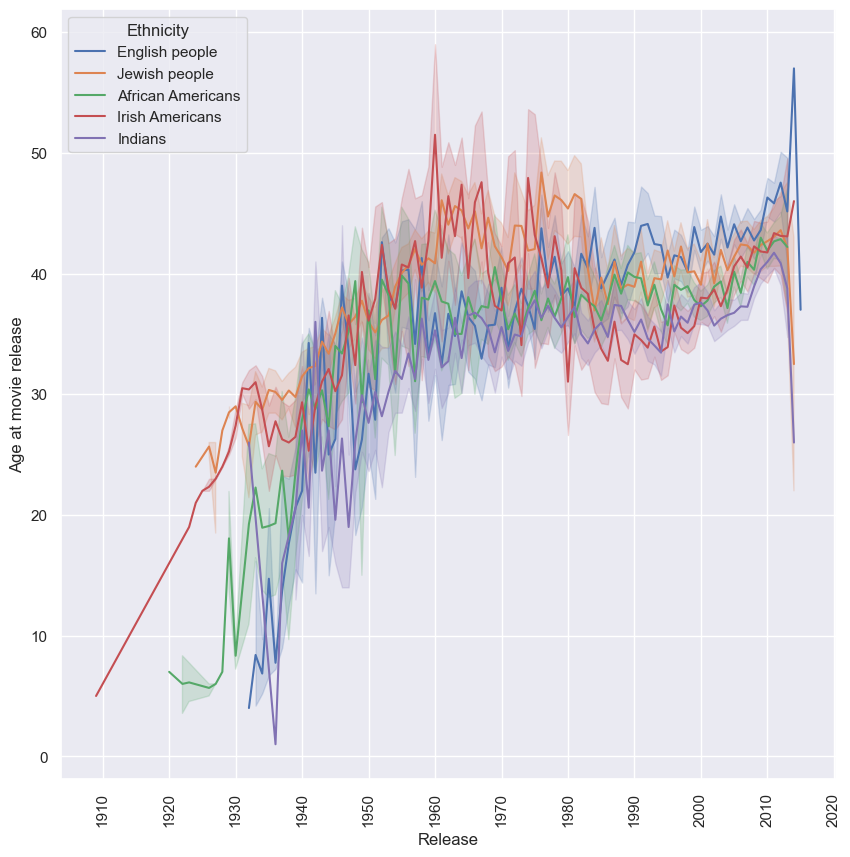

In [110]:
#tmp = charac_group[charac_group["Age at movie release"].notna()][charac_group["Release"].notna()].loc["Argentina"].reset_index(drop=True)

tmp = charac_group.reset_index().drop(columns="level_1")
tmp = tmp[tmp["Age at movie release"]>0][tmp["Release"].notna()][tmp["Ethnicity"].notna()]
tmp = tmp[tmp["Ethnicity"].isin(tmp["Ethnicity"].value_counts().nlargest(5).index)]

tmp["Release"] = tmp["Release"].astype(float)
sns.lineplot(data=tmp, x = "Release", y="Age at movie release", hue="Ethnicity")
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=20)


C:\Users\nico9\AppData\Local\Temp\ipykernel_24104\2811452016.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[tmp["Age at movie release"]>0][tmp["Release"].notna()][tmp["Gender"].notna()]


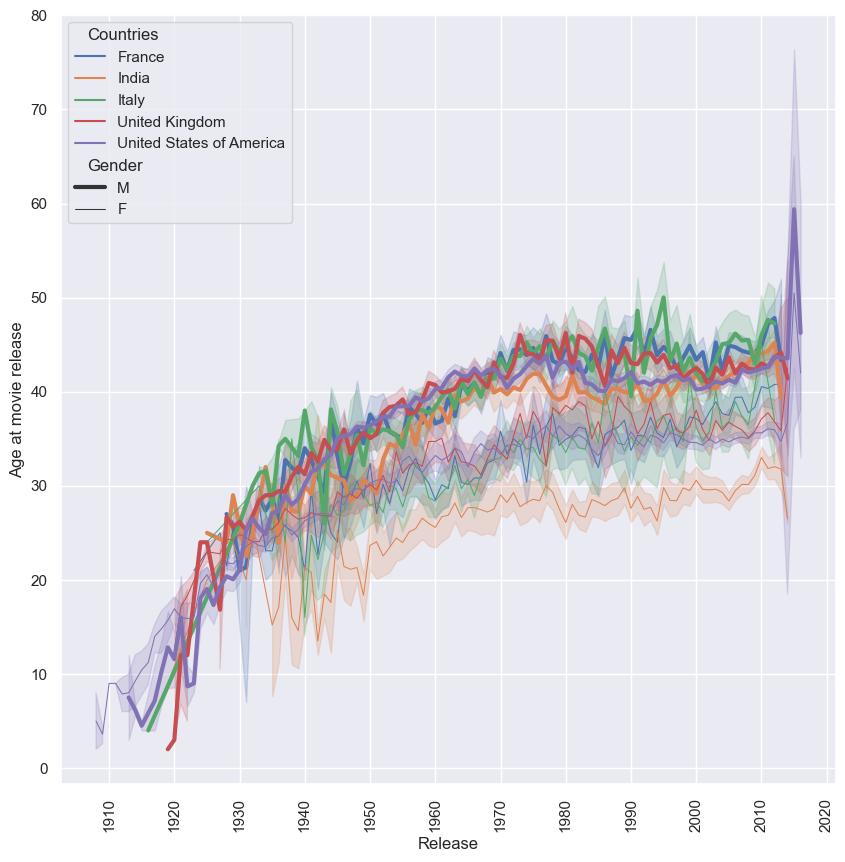

In [111]:
tmp = charac_group.reset_index().drop(columns="level_1")
tmp = tmp[tmp["Age at movie release"]>0][tmp["Release"].notna()][tmp["Gender"].notna()]

tmp["Release"] = tmp["Release"].astype(float)
sns.lineplot(data=tmp, x = "Release", y="Age at movie release", hue="Countries", size="Gender")
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=20)